## Data Understanding

### Initial Overview

In [2]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import matplotlib.pyplot as plt

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [ ]:
path = "data/kip_sdm_syn.csv"
df = pd.read_csv(path, sep=",")

In [4]:
%matplotlib inline


In [ ]:
AV = AutoViz_Class()

# Load the dataset and generate visualizations
AV.AutoViz(df)

In [5]:
df.columns

Index(['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1',
       'decubitus-admission', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-jones',
       'bed_mobility-skin_condition', 'transfer-impairment', 'transfer',
       'medical_items', 'medical_items-arm_or_leg_splint',
       'medical_items-A_V_system', 'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking', 'medical_items-ventilation_mask',
       'medical_items-O2_glasses', 'medical_items-orthesis',
       'medical_items-prosthesis',
       'medical_items-skin_condition_at_item_application',
       'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay',
       'fall-while_transfer', 'walk-impairment', 'walk-jones',
       'walk-balance_and_gait_impaired', 'walking_aid',
       'excretions-impairment', 'excretions-incontinence',
       'excretions-nykturie', 'cognition-impairment',
       'cognition-disoriented_time', 'cognition-disoriented_locati

## Imputation with Model by Checking Correlation

### Creating Dummies

In [5]:
df['transfer'] = df['transfer'].fillna('Unknown')
df = pd.get_dummies(df, columns=['transfer'])


In [6]:
df['bed_mobility-jones'] = df['bed_mobility-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['bed_mobility-jones'])

In [7]:
df['walk-jones'] = df['walk-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['walk-jones'])

In [8]:
df['decubitus-risk'] = df['decubitus-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['decubitus-risk'])

In [9]:
df['fall-risk'] = df['fall-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['fall-risk'])

In [10]:
df['procedure'] = df['procedure'].fillna('Unknown')
df = pd.get_dummies(df, columns=['procedure'])

In [11]:
df['diagnosis'] = df['diagnosis'].fillna('Unknown')
df = pd.get_dummies(df, columns=['diagnosis'])

In [12]:
df['sex'] = df['sex'].fillna('Unknown')
df = pd.get_dummies(df, columns=['sex'])

In [13]:
df.info

<bound method DataFrame.info of        fallen    id    age  c_zriserh1 decubitus-admission  \
0       False  179020  39      False             NaN         
1       False  112009  29      False           False         
2       False   54403  29      False             NaN         
3       False   13054  64       True             NaN         
4       False   45770  89      False             NaN         
...       ...     ...  ...         ...                 ...   
39995   False   89687  39      False             NaN         
39996   False  173073  49      False           False         
39997   False   41549  74      False           False         
39998   False  464294  59      False             NaN         
39999   False   85918  39      False             NaN         

      decubitus-at_the_moment bed_mobility-impairment  \
0                 NaN                     NaN           
1                 NaN                     NaN           
2               False                     NaN       

In [14]:
df.head()

,fallen,id,age,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-skin_condition,transfer-impairment,medical_items,medical_items-arm_or_leg_splint,medical_items-A_V_system,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,medical_items-orthesis,medical_items-prosthesis,medical_items-skin_condition_at_item_application,fall-last_12_month,fall-how_many_last_12_month,fall-while_stay,fall-while_transfer,walk-impairment,walk-balance_and_gait_impaired,walking_aid,excretions-impairment,excretions-incontinence,excretions-nykturie,cognition-impairment,cognition-disoriented_time,cognition-disoriented_location,cognition-disoriented_own_person,cognition-agitated,cognition-confused,psychotropic_or_sedatives_drugs,diseases,transfer_1,transfer_2,transfer_3,transfer_4A,transfer_4B,transfer_Unknown,bed_mobility-jones_1,bed_mobility-jones_2,bed_mobility-jones_3,bed_mobility-jones_4A,bed_mobility-jones_4B,bed_mobility-jones_Unknown,walk-jones_1,walk-jones_2,walk-jones_3,walk-jones_4A,walk-jones_4B,walk-jones_Unknown,decubitus-risk_+,decubitus-risk_++,decubitus-risk_0,decubitus-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-risk_Unknown,procedure_0,procedure_1-10,procedure_1-20,procedure_1-22,procedure_1-24,procedure_1-26,procedure_1-27,procedure_1-31,procedure_1-33,procedure_1-40,procedure_1-41,procedure_1-42,procedure_1-43,procedure_1-44,procedure_1-46,procedure_1-47,procedure_1-48,procedure_1-49,procedure_1-50,procedure_1-51,procedure_1-52,procedure_1-53,procedure_1-54,procedure_1-55,procedure_1-56,procedure_1-57,procedure_1-58,procedure_1-61,procedure_1-62,procedure_1-63,procedure_1-64,procedure_1-65,procedure_1-66,procedure_1-67,procedure_1-69,procedure_1-70,procedure_1-71,procedure_1-76,procedure_1-77,procedure_1-79,procedure_1-84,procedure_1-85,procedure_1-90,procedure_1-91,procedure_1-92,procedure_1-93,procedure_1-94,procedure_3-03,procedure_3-05,procedure_3-10,procedure_3-13,procedure_3-20,procedure_3-22,procedure_3-30,procedure_3-31,procedure_3-60,procedure_3-61,procedure_3-70,procedure_3-72,procedure_3-73,procedure_3-75,procedure_3-76,procedure_3-80,procedure_3-82,procedure_3-84,procedure_3-90,procedure_3-99,procedure_5-01,procedure_5-02,procedure_5-03,procedure_5-04,procedure_5-05,procedure_5-06,procedure_5-07,procedure_5-08,procedure_5-09,procedure_5-10,procedure_5-11,procedure_5-12,procedure_5-13,procedure_5-14,procedure_5-15,procedure_5-16,procedure_5-18,procedure_5-19,procedure_5-20,procedure_5-21,procedure_5-22,procedure_5-23,procedure_5-24,procedure_5-25,procedure_5-26,procedure_5-27,procedure_5-28,procedure_5-29,procedure_5-30,procedure_5-31,procedure_5-32,procedure_5-33,procedure_5-34,procedure_5-35,procedure_5-36,procedure_5-37,procedure_5-38,procedure_5-39,procedure_5-40,procedure_5-41,procedure_5-42,procedure_5-43,procedure_5-44,procedure_5-45,procedure_5-46,procedure_5-47,procedure_5-48,procedure_5-49,procedure_5-50,procedure_5-51,procedure_5-52,procedure_5-53,procedure_5-54,procedure_5-55,procedure_5-56,procedure_5-57,procedure_5-58,procedure_5-59,procedure_5-60,procedure_5-61,procedure_5-62,procedure_5-63,procedure_5-64,procedure_5-65,procedure_5-66,procedure_5-67,procedure_5-68,procedure_5-69,procedure_5-70,procedure_5-71,procedure_5-72,procedure_5-73,procedure_5-74,procedure_5-75,procedure_5-76,procedure_5-77,procedure_5-78,procedure_5-79,procedure_5-80,procedure_5-81,procedure_5-82,procedure_5-83,procedure_5-84,procedure_5-85,procedure_5-86,procedure_5-87,procedure_5-88,procedure_5-89,procedure_5-90,procedure_5-91,procedure_5-93,procedure_5-98,procedure_6-00,procedure_8-01,procedure_8-02,procedure_8-03,procedure_8-10,procedure_8-11,procedure_8-12,procedure_8-13,procedure_8-14,procedure_8-15,procedure_8-17,procedure_8-19,procedure_8-39,procedure_8-50,procedure_8-51,procedure_8-52,procedure_8-53,procedure_8-54,procedure_8-55,procedure_8-56,procedure_8-60,procedure_8-63,procedure_8-64,procedure_8-7

In [40]:
df["diagnosis_T780"].value_counts()

diagnosis_T780
False    39997
True         3
Name: count, dtype: int64

The dummy-variables for the diagnosis and and procedure create many dimensions. Lets check how they are correlated with the target variable. 

In [42]:
pd.set_option('display.max_rows', 100)

In [44]:
correlations = df.corrwith(df["fallen"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

fallen                                              1.000000
fall-while_stay                                     0.479318
medical_items-skin_condition_at_item_application    0.322410
walk-balance_and_gait_impaired                      0.255821
fall-how_many_last_12_month                         0.202856
excretions-impairment                               0.196862
cognition-impairment                                0.192049
excretions-incontinence                             0.170097
transfer-impairment                                 0.158168
fall-while_transfer                                 0.156993
fall-risk_+                                         0.153170
bed_mobility-impairment                             0.152331
fall-last_12_month                                  0.150537
walk-impairment                                     0.146825
walk-jones_1                                        0.140071
cognition-agitated                                  0.105473
walking_aid             

The varaibles with the highest correlation are very sparse. Lets try to impute them with a model. To check whether this is achievable we look at the correlation between all the variables and the varibel that is to be imputed.

### Creating Correlation Matrix with target that is to be imputed

In [45]:
correlations = df.corrwith(df["fall-while_stay"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

fall-while_stay                                     1.000000
bed_mobility-skin_condition                         0.765747
medical_items-skin_condition_at_item_application    0.656140
decubitus-at_the_moment                             0.540905
excretions-impairment                               0.482140
fallen                                              0.479318
walk-balance_and_gait_impaired                      0.472672
transfer-impairment                                 0.447844
cognition-impairment                                0.444860
fall-while_transfer                                 0.439008
fall-risk_+                                         0.408964
diseases                                            0.401086
excretions-incontinence                             0.390210
walk-impairment                                     0.387739
cognition-agitated                                  0.380630
bed_mobility-impairment                             0.380144
fall-how_many_last_12_mo

In [46]:
correlations = df.corrwith(df["medical_items-skin_condition_at_item_application"], method="spearman").abs().sort_values(ascending=False).to_string()
print(correlations)

medical_items-skin_condition_at_item_application    1.000000
bed_mobility-skin_condition                         0.761812
decubitus-at_the_moment                             0.760195
fall-while_stay                                     0.656140
bed_mobility-impairment                             0.473211
medical_items                                       0.450092
transfer-impairment                                 0.410209
fall-while_transfer                                 0.403016
fall-risk_+                                         0.375839
medical_items-O2_glasses                            0.374639
walk-impairment                                     0.360180
decubitus-risk_+                                    0.350720
fallen                                              0.322410
walk-balance_and_gait_impaired                      0.290662
procedure_5-21                                      0.261482
procedure_1-94                                      0.227895
diagnosis_K227          

Unfortunately the most correlated features for "fall-while_stay" and "medical_items-skin_condition_at_item_application", e.g. "bed_mobility-skin_condition" or "decubitus-at_the_moment" are very sparse themselves. This makes it unfeasible to predict them properly. Lets try to cerate a dumm variable "Unknownw" for cases in which there are NANs in the columns "fall-while_stay" and "medical_items-skin_condition_at_item_application".

In [ ]:
df["decubitus-admission"].value_counts()

decubitus-admission
False    9399
Name: count, dtype: int64

In [ ]:
df["transfer"].value_counts()

transfer
2     2230
3      492
4A     178
1       96
4B      10
Name: count, dtype: int64

In [ ]:
df.head()

,fallen,id,age,procedure,diagnosis,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-jones,bed_mobility-skin_condition,transfer-impairment,transfer,medical_items,medical_items-arm_or_leg_splint,medical_items-A_V_system,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,medical_items-orthesis,medical_items-prosthesis,medical_items-skin_condition_at_item_application,fall-last_12_month,fall-how_many_last_12_month,fall-while_stay,fall-while_transfer,walk-impairment,walk-jones,walk-balance_and_gait_impaired,walking_aid,excretions-impairment,excretions-incontinence,excretions-nykturie,cognition-impairment,cognition-disoriented_time,cognition-disoriented_location,cognition-disoriented_own_person,cognition-agitated,cognition-confused,psychotropic_or_sedatives_drugs,decubitus-risk,fall-risk,diseases,sex
0,False,179020,39,0,S250,False,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,2,False,False,False,False,False,NaN,False,False,False,False,False,False,NaN,NaN,False,female
1,False,112009,29,0,M418,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,NaN,False,False,NaN,False,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,male
2,False,54403,29,9-26,S910,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False,NaN,False,False,NaN,False,False,NaN,False,False,False,False,False,NaN,NaN,0,NaN,female
3,False,13054,64,8-77,M400,True,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,False,False,True,True,False,NaN,False,False,False,False,False,False,0,0,False,male
4,False,45770,89,8-93,K630,False,NaN,False,NaN,NaN,NaN,NaN,2,NaN,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,male


In [ ]:
observatios = (df.shape[0])
print(f"There are {observatios} observations")

There are 40000 observations


### Non-Expert Explanation visible here

In [ ]:
column_explainer = pd.read_csv("synth_data_column_explainer.csv", sep=";", index_col=0).reset_index(drop=True)

In [ ]:
column_explainer.head(50)

,COL,DATA_TYPE,N_MISSING,EXPLANATION,NONEXPERT_EXPLANATION
0,fallen,logical,0,Ist der Patient gestÃ¼rzt?,NaN
1,id,integer,0,Identifier of the patient.,NaN
2,age,integer,0,Age of the patient (5 year bins,NaN
3,procedure,character,0,OPS Code,The operation and procedure code (OPS) is the ...
4,diagnosis,character,0,ICD10 Code,The ICD10 code is the official classification ...
5,c_zriserh1,logical,0,Use of this column is not documented.,NaN
6,decubitus-admission,logical,30601,Was a decubitus present during admission?,"Bei Dekubitus, auch bekannt als Wundliegen ode..."
7,decubitus-at_the_moment,logical,30401,Does the patient currently show decubitus?,NaN
8,bed_mobility-impairment,logical,28872,"Is the """"BettmobilitÃ¤t (Jones)"""" affected?",Bed mobility refers to a person's ability to m...
9,bed_mobility-jones,character,0,"Jones value of """"BettmobilitÃ¤t"""".",NaN


In [ ]:
df.dtypes

fallen                                                 bool
id                                                    int64
age                                                   int64
procedure                                            object
diagnosis                                            object
c_zriserh1                                             bool
decubitus-admission                                  object
decubitus-at_the_moment                              object
bed_mobility-impairment                              object
bed_mobility-jones                                   object
bed_mobility-skin_condition                          object
transfer-impairment                                  object
transfer                                             object
medical_items                                        object
medical_items-arm_or_leg_splint                        bool
medical_items-A_V_system                               bool
medical_items-plaster_or_neck_brace     

In [ ]:
na_count_per_column = df.isna().sum()
print(na_count_per_column)


fallen                                                  0
id                                                      0
age                                                     0
procedure                                               0
diagnosis                                               0
c_zriserh1                                              0
decubitus-admission                                 30601
decubitus-at_the_moment                             30401
bed_mobility-impairment                             28872
bed_mobility-jones                                  37593
bed_mobility-skin_condition                         38447
transfer-impairment                                 28588
transfer                                            36994
medical_items                                       29203
medical_items-arm_or_leg_splint                         0
medical_items-A_V_system                                0
medical_items-plaster_or_neck_brace                     0
medical_items-

I get way more NaN for bed_mobility_jones and transfers than reported in the column_explainer.csv?


I am going to convert some of the "object" variables into boolean.

In [ ]:
df["decubitus-admission"] = df["decubitus-admission"].astype("boolean")
df["decubitus-at_the_moment"] = df["decubitus-at_the_moment"].astype("boolean")
df["bed_mobility-impairment"] = df["bed_mobility-impairment"].astype("boolean")
df["bed_mobility-skin_condition"] = df["bed_mobility-skin_condition"].astype("boolean")
df["transfer-impairment"] = df["transfer-impairment"].astype("boolean")
df["medical_items"] = df["medical_items"].astype("boolean")
df["medical_items-skin_condition_at_item_application"] = df["medical_items-skin_condition_at_item_application"].astype("boolean")
df["fall-last_12_month"] = df["fall-last_12_month"].astype("boolean")
df["fall-while_stay"] = df["fall-while_stay"].astype("boolean")
df["fall-while_transfer"] = df["fall-while_transfer"].astype("boolean")
df["walk-impairment"] = df["walk-impairment"].astype("boolean")
df["excretions-impairment"] = df["excretions-impairment"].astype("boolean")
df["cognition-impairment"] = df["cognition-impairment"].astype("boolean")
df["psychotropic_or_sedatives_drugs"] = df["psychotropic_or_sedatives_drugs"].astype("boolean")
df["diseases"] = df["diseases"].astype("boolean")

fall-how_many_last_12_month was not converted to integer as it contains NaN values. Not sure yet how I want to handle those.

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

fallen                                                  2
id                                                  38226
age                                                    84
procedure                                             209
diagnosis                                            3345
c_zriserh1                                              2
decubitus-admission                                     1
decubitus-at_the_moment                                 2
bed_mobility-impairment                                 2
bed_mobility-jones                                      5
bed_mobility-skin_condition                             2
transfer-impairment                                     2
transfer                                                5
medical_items                                           2
medical_items-arm_or_leg_splint                         2
medical_items-A_V_system                                1
medical_items-plaster_or_neck_brace                     2
medical_items-

### Mean and variance of variables

In [ ]:
numeric_columns = df.select_dtypes(include=["number", "bool"])

# Calculate variance for numeric columns
variance_numeric_columns = numeric_columns.var()

print(variance_numeric_columns)

fallen                                                       0.002369
id                                                  40110818655.26786
age                                                        365.732243
c_zriserh1                                                   0.137946
decubitus-admission                                               0.0
decubitus-at_the_moment                                       0.00888
bed_mobility-impairment                                      0.136875
bed_mobility-skin_condition                                  0.069159
transfer-impairment                                          0.164202
medical_items                                                0.122432
medical_items-arm_or_leg_splint                              0.004083
medical_items-A_V_system                                          0.0
medical_items-plaster_or_neck_brace                          0.002668
medical_items-compression_stocking                           0.000874
medical_items-ventil

In [ ]:
numeric_columns = df.select_dtypes(include=["number", "boolean"])

# Calculate variance for numeric columns
variance_numeric_columns = numeric_columns.mean()

print(variance_numeric_columns)

fallen                                                 0.002375
id                                                  238069.6774
age                                                       57.66
c_zriserh1                                              0.16525
decubitus-admission                                         0.0
decubitus-at_the_moment                                0.008959
bed_mobility-impairment                                0.163641
bed_mobility-skin_condition                            0.074694
transfer-impairment                                    0.207063
medical_items                                          0.142817
medical_items-arm_or_leg_splint                          0.0041
medical_items-A_V_system                                    0.0
medical_items-plaster_or_neck_brace                    0.002675
medical_items-compression_stocking                     0.000875
medical_items-ventilation_mask                         0.000825
medical_items-O2_glasses                

medical_items-A_V_system, decubitus-admission seem to have no variance and zero-only entries

medical_items-compression_stocking, medical_items-ventilation_mask have very little variance and most entries are zero. I am not sure about deleting them though.

In [ ]:
na_percentage = df.isna().mean() * 100
print(na_percentage)

fallen                                               0.0000
id                                                   0.0000
age                                                  0.0000
procedure                                            0.0000
diagnosis                                            0.0000
c_zriserh1                                           0.0000
decubitus-admission                                 76.5025
decubitus-at_the_moment                             76.0025
bed_mobility-impairment                             72.1800
bed_mobility-jones                                  93.9825
bed_mobility-skin_condition                         96.1175
transfer-impairment                                 71.4700
transfer                                            92.4850
medical_items                                       73.0075
medical_items-arm_or_leg_splint                      0.0000
medical_items-A_V_system                             0.0000
medical_items-plaster_or_neck_brace     

In [ ]:
df["walking_aid"].value_counts()

walking_aid
False    39067
True       933
Name: count, dtype: int64

### Handling of Categorial Data into One-Hot Encoding

In [ ]:
df['transfer'] = df['transfer'].fillna('Unknown')
df = pd.get_dummies(df, columns=['transfer'])


In [ ]:
df['bed_mobility-jones'] = df['bed_mobility-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['bed_mobility-jones'])

In [ ]:
df['walk-jones'] = df['walk-jones'].fillna('Unknown')
df = pd.get_dummies(df, columns=['walk-jones'])

In [ ]:
df['decubitus-risk'] = df['decubitus-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['decubitus-risk'])

In [ ]:
df['fall-risk'] = df['fall-risk'].fillna('Unknown')
df = pd.get_dummies(df, columns=['fall-risk'])

In [ ]:
df['transfer'] = df['transfer'].fillna('Unknown')
df = pd.get_dummies(df, columns=['transfer'])

In [ ]:
df['procedure'] = df['procedure'].fillna('Unknown')
df = pd.get_dummies(df, columns=['procedure'])

In [ ]:
df['diagnosis'] = df['diagnosis'].fillna('Unknown')
df = pd.get_dummies(df, columns=['diagnosis'])

### Correlation between PredictorVariables and Fallen

In [ ]:
print(df.dtypes)


fallen                      bool
id                         int64
age                        int64
procedure                 object
diagnosis                 object
                           ...  
decubitus-risk_Unknown      bool
fall-risk_+                 bool
fall-risk_++                bool
fall-risk_0                 bool
fall-risk_Unknown           bool
Length: 66, dtype: object


In [ ]:
from scipy.stats import pointbiserialr

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    non_nan_rows = df[col].notna()
    correlation, p_value = pointbiserialr(df[col][non_nan_rows], df['fallen'][non_nan_rows])
    print(f"{col}: correlation={correlation:.2f}, p-value={p_value:.4f}")


id: correlation=-0.01, p-value=0.0053
age: correlation=0.06, p-value=0.0000
fall-how_many_last_12_month: correlation=0.20, p-value=0.0000


In [ ]:
df.columns

Index(['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1',
       'decubitus-admission', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-skin_condition',
       'transfer-impairment', 'medical_items',
       'medical_items-arm_or_leg_splint', 'medical_items-A_V_system',
       'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking', 'medical_items-ventilation_mask',
       'medical_items-O2_glasses', 'medical_items-orthesis',
       'medical_items-prosthesis',
       'medical_items-skin_condition_at_item_application',
       'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay',
       'fall-while_transfer', 'walk-impairment',
       'walk-balance_and_gait_impaired', 'walking_aid',
       'excretions-impairment', 'excretions-incontinence',
       'excretions-nykturie', 'cognition-impairment',
       'cognition-disoriented_time', 'cognition-disoriented_location',
       'cognition-disoriented_own_person', 

In [ ]:
from scipy.stats import chi2_contingency

categorical_columns = ['transfer_1', 'transfer_2', 'transfer_3', 'transfer_4A', 'transfer_4B', 'transfer_Unknown', 'bed_mobility-jones_1',
       'bed_mobility-jones_2', 'bed_mobility-jones_3', 'bed_mobility-jones_4A',
       'bed_mobility-jones_4B', 'bed_mobility-jones_Unknown', 'walk-jones_1',
       'walk-jones_2', 'walk-jones_3', 'walk-jones_4A', 'walk-jones_4B',
       'walk-jones_Unknown', 'decubitus-risk_+', 'decubitus-risk_++',
       'decubitus-risk_0', 'decubitus-risk_Unknown', 'fall-risk_+',
       'fall-risk_++', 'fall-risk_0', 'fall-risk_Unknown']  # Add your categorical variables

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['fallen'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square test for {col}: χ²={chi2:.2f}, p-value={p:.4f}")

Chi-Square test for transfer_1: χ²=122.49, p-value=0.0000
Chi-Square test for transfer_2: χ²=1.57, p-value=0.2106
Chi-Square test for transfer_3: χ²=178.39, p-value=0.0000
Chi-Square test for transfer_4A: χ²=155.39, p-value=0.0000
Chi-Square test for transfer_4B: χ²=0.00, p-value=1.0000
Chi-Square test for transfer_Unknown: χ²=97.64, p-value=0.0000
Chi-Square test for bed_mobility-jones_1: χ²=132.93, p-value=0.0000
Chi-Square test for bed_mobility-jones_2: χ²=0.58, p-value=0.4466
Chi-Square test for bed_mobility-jones_3: χ²=152.91, p-value=0.0000
Chi-Square test for bed_mobility-jones_4A: χ²=81.44, p-value=0.0000
Chi-Square test for bed_mobility-jones_4B: χ²=0.00, p-value=1.0000
Chi-Square test for bed_mobility-jones_Unknown: χ²=96.85, p-value=0.0000
Chi-Square test for walk-jones_1: χ²=758.73, p-value=0.0000
Chi-Square test for walk-jones_2: χ²=2.17, p-value=0.1406
Chi-Square test for walk-jones_3: χ²=93.86, p-value=0.0000
Chi-Square test for walk-jones_4A: χ²=139.13, p-value=0.0000
C

In [ ]:
boolean_columns = df.select_dtypes(include=['bool']).columns.drop("fallen")
boolean_columns

Index(['c_zriserh1', 'decubitus-admission', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-skin_condition',
       'transfer-impairment', 'medical_items',
       'medical_items-arm_or_leg_splint', 'medical_items-A_V_system',
       'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking', 'medical_items-ventilation_mask',
       'medical_items-O2_glasses', 'medical_items-orthesis',
       'medical_items-prosthesis',
       'medical_items-skin_condition_at_item_application',
       'fall-last_12_month', 'fall-while_stay', 'fall-while_transfer',
       'walk-impairment', 'walk-balance_and_gait_impaired', 'walking_aid',
       'excretions-impairment', 'excretions-incontinence',
       'excretions-nykturie', 'cognition-impairment',
       'cognition-disoriented_time', 'cognition-disoriented_location',
       'cognition-disoriented_own_person', 'cognition-agitated',
       'cognition-confused', 'psychotropic_or_sedatives_drugs', 'disease

In [ ]:
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r-1, k-1))

In [ ]:
for col in boolean_columns:
    print(f"{col}: Cramér's V={cramers_v(df[col], df['fallen']):.2f}")

c_zriserh1: Cramér's V=0.03
decubitus-admission: Cramér's V=nan
decubitus-at_the_moment: Cramér's V=0.05
bed_mobility-impairment: Cramér's V=0.15
bed_mobility-skin_condition: Cramér's V=0.06
transfer-impairment: Cramér's V=0.16
medical_items: Cramér's V=0.07
medical_items-arm_or_leg_splint: Cramér's V=0.00
medical_items-A_V_system: Cramér's V=nan
medical_items-plaster_or_neck_brace: Cramér's V=0.00
medical_items-compression_stocking: Cramér's V=0.00
medical_items-ventilation_mask: Cramér's V=0.00
medical_items-O2_glasses: Cramér's V=0.06
medical_items-orthesis: Cramér's V=0.01
medical_items-prosthesis: Cramér's V=0.00
medical_items-skin_condition_at_item_application: Cramér's V=0.24
fall-last_12_month: Cramér's V=0.15
fall-while_stay: Cramér's V=0.47
fall-while_transfer: Cramér's V=0.16
walk-impairment: Cramér's V=0.15
walk-balance_and_gait_impaired: Cramér's V=0.25
walking_aid: Cramér's V=0.10
excretions-impairment: Cramér's V=0.19
excretions-incontinence: Cramér's V=0.17
excretions-n

C:\Users\felix\AppData\Local\Temp\ipykernel_2324\871208691.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r-1, k-1))
C:\Users\felix\AppData\Local\Temp\ipykernel_2324\871208691.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / min(r-1, k-1))


transfer_3: Cramér's V=0.07
transfer_4A: Cramér's V=0.06
transfer_4B: Cramér's V=0.00
transfer_Unknown: Cramér's V=0.05
bed_mobility-jones_1: Cramér's V=0.06
bed_mobility-jones_2: Cramér's V=0.00
bed_mobility-jones_3: Cramér's V=0.06
bed_mobility-jones_4A: Cramér's V=0.05
bed_mobility-jones_4B: Cramér's V=0.00
bed_mobility-jones_Unknown: Cramér's V=0.05
walk-jones_1: Cramér's V=0.14
walk-jones_2: Cramér's V=0.01
walk-jones_3: Cramér's V=0.05
walk-jones_4A: Cramér's V=0.06
walk-jones_4B: Cramér's V=0.03
walk-jones_Unknown: Cramér's V=0.08
decubitus-risk_+: Cramér's V=0.10
decubitus-risk_++: Cramér's V=0.05
decubitus-risk_0: Cramér's V=0.01
decubitus-risk_Unknown: Cramér's V=0.05
fall-risk_+: Cramér's V=0.15
fall-risk_++: Cramér's V=0.00
fall-risk_0: Cramér's V=0.02
fall-risk_Unknown: Cramér's V=0.07


### 5 Variables with highest Correlation
#### Walk balance and gait impairment
#### Fall while stay
#### Fall risk +
#### Cognition impariment
#### Excretions impairment/incontinence
#### medical_items-skin_condition_at_item_application

The results of the Chi-Square Test and the Cramers V yield different resutls. However the Cramérs V is supposed to be more robust so more weight was put on its result.

### Relationship between two Cateorial Veriables with high Correlation 

In [ ]:
import pandas as pd

pd.crosstab(df['fall-risk_+'], df['fall-while_transfer'])


fall-while_transfer,False,True
fall-risk_+,,
False,8630,242
True,355,2152


In [ ]:
print(df.describe())

                 id           age  fall-how_many_last_12_month
count  4.000000e+04  40000.000000                  1400.000000
mean   2.380697e+05     57.660000                     1.754659
std    2.002769e+05     19.124127                     1.543340
min    2.600000e+02     19.000000                     1.000000
25%    7.753400e+04     39.000000                     1.000000
50%    1.809265e+05     59.000000                     1.000000
75%    3.510728e+05     74.000000                     1.000000
max    1.060987e+06    104.000000                     5.000000


In [ ]:
df["fallen"].value_counts()

fallen
False    39905
True        95
Name: count, dtype: int64

In [ ]:
import statsmodels.api as sm

# Define predictor (X) and outcome (y)
X = df[['age']]  # Predictor variable
X = sm.add_constant(X)  # Adds an intercept term
y = df['fallen']  # Binary outcome

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.014705
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 fallen   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39998
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.1207
Time:                        09:27:10   Log-Likelihood:                -588.21
converged:                       True   LL-Null:                       -668.95
Covariance Type:            nonrobust   LLR p-value:                 5.368e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8227      0.645    -18.321      0.000     -13.088     -10.558
age            0.0813      0

In [ ]:
df.std(numeric_only=True)

fallen                         0.048677
id                        200276.855016
age                           19.124127
c_zriserh1                     0.371411
decubitus-admission                 0.0
                              ...      
decubitus-risk_Unknown         0.452473
fall-risk_+                    0.289206
fall-risk_++                   0.070006
fall-risk_0                     0.40813
fall-risk_Unknown              0.461755
Length: 63, dtype: Float64

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', 100)  # Show up to 100 rows
pd.set_option('display.max_columns', 50)

In [ ]:
df["fall-risk_0"].value_counts()

fall-risk_0
False    31554
True      8446
Name: count, dtype: int64

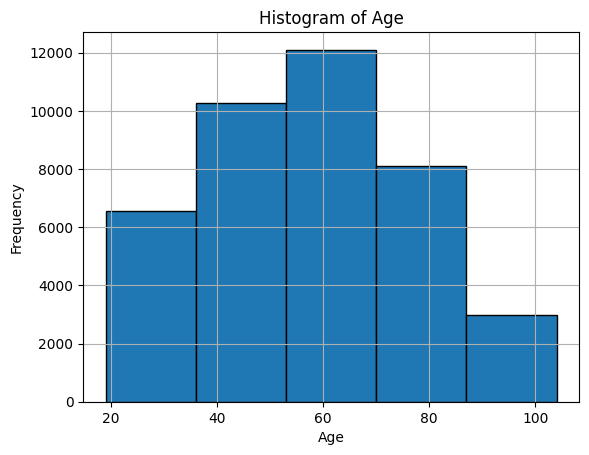

In [ ]:
import matplotlib.pyplot as plt
df['age'].hist(bins=5, edgecolor='black')

# Customize plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

In [ ]:
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

In [ ]:
filtered_df = df.loc[:, ~df.columns.isin(['procedure', 'diagnosis', 'medical_items-A_V_system', 'decubitus-admission'])]

In [ ]:
corr_matrix = filtered_df.corr()
strong_corr = corr_matrix[abs(corr_matrix) > 0.3]
print(strong_corr)

                                                    fallen   id       age  \
fallen                                            1.000000  NaN       NaN   
id                                                     NaN  1.0       NaN   
age                                                    NaN  NaN  1.000000   
c_zriserh1                                             NaN  NaN       NaN   
decubitus-at_the_moment                                NaN  NaN       NaN   
bed_mobility-impairment                                NaN  NaN       NaN   
bed_mobility-skin_condition                            NaN  NaN       NaN   
transfer-impairment                                    NaN  NaN  0.324295   
medical_items                                          NaN  NaN       NaN   
medical_items-arm_or_leg_splint                        NaN  NaN       NaN   
medical_items-plaster_or_neck_brace                    NaN  NaN       NaN   
medical_items-compression_stocking                     NaN  NaN       NaN   

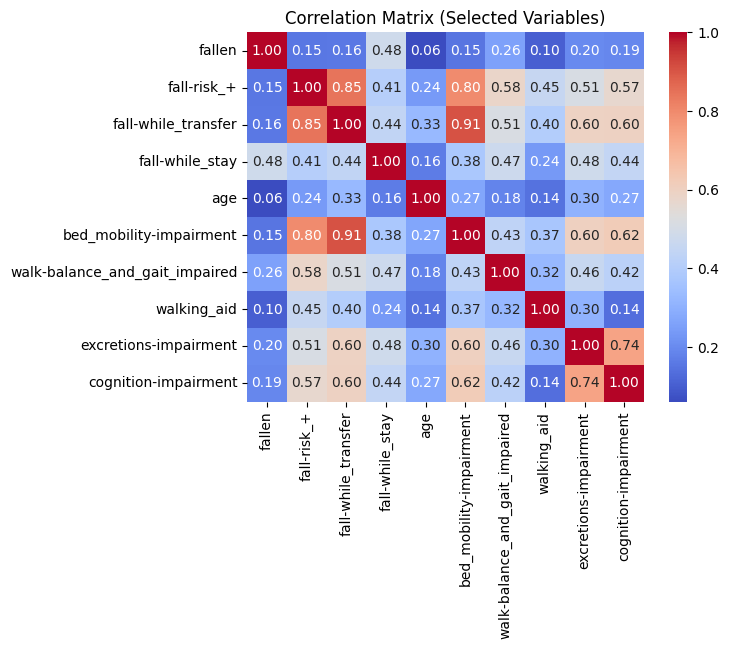

In [ ]:
import seaborn as sns

subset_cols = ['fallen', 'fall-risk_+', 'fall-while_transfer', 'fall-while_stay', 'age', 'bed_mobility-impairment', 'walk-balance_and_gait_impaired', 'walking_aid', 'excretions-impairment', 'cognition-impairment']
subset_corr = df[subset_cols].corr()

# Heatmap
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Selected Variables)")
plt.show()

In [ ]:
sum(df["excretions-impairment"].isna())

29917

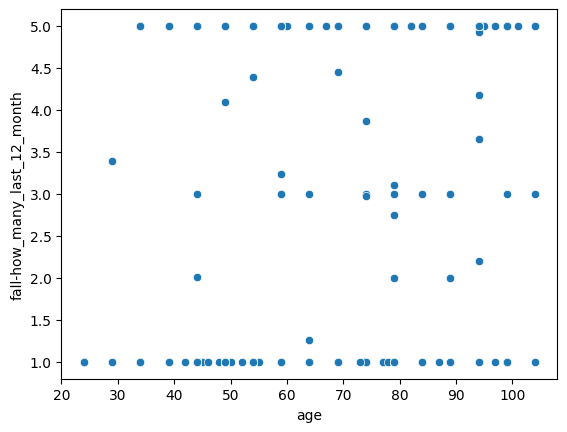

In [ ]:
import seaborn as sns

sns.scatterplot(x=df['age'], y=df['fall-how_many_last_12_month'])
plt.show()

In [ ]:
na_percentage = df.isna().mean() * 100
print(na_percentage)

fallen                                               0.0000
id                                                   0.0000
age                                                  0.0000
procedure                                            0.0000
diagnosis                                            0.0000
c_zriserh1                                           0.0000
decubitus-admission                                 76.5025
decubitus-at_the_moment                             76.0025
bed_mobility-impairment                             72.1800
bed_mobility-skin_condition                         96.1175
transfer-impairment                                 71.4700
medical_items                                       73.0075
medical_items-arm_or_leg_splint                      0.0000
medical_items-A_V_system                             0.0000
medical_items-plaster_or_neck_brace                  0.0000
medical_items-compression_stocking                   0.0000
medical_items-ventilation_mask          

In [ ]:
df["fallen"].value_counts()

fallen
False    39905
True        95
Name: count, dtype: int64

In [ ]:
df[['fallen', 'medical_items-skin_condition_at_item_application', 'bed_mobility-skin_condition', 'fall-while_stay', "fall-how_many_last_12_month", "bed_mobility-skin_condition", "medical_items-skin_condition_at_item_application"]].corr()


,fallen,medical_items-skin_condition_at_item_application,bed_mobility-skin_condition,fall-while_stay,fall-how_many_last_12_month,bed_mobility-skin_condition,medical_items-skin_condition_at_item_application
fallen,1.000000,0.322410,0.082209,0.479318,0.198397,0.082209,0.322410
medical_items-skin_condition_at_item_application,0.322410,1.000000,0.761812,0.656140,NaN,0.761812,1.000000
bed_mobility-skin_condition,0.082209,0.761812,1.000000,0.765747,0.326028,1.000000,0.761812
fall-while_stay,0.479318,0.656140,0.765747,1.000000,0.373051,0.765747,0.656140
fall-how_many_last_12_month,0.198397,NaN,0.326028,0.373051,1.000000,0.326028,NaN
bed_mobility-skin_condition,0.082209,0.761812,1.000000,0.765747,0.326028,1.000000,0.761812
medical_items-skin_condition_at_item_application,0.322410,1.000000,0.761812,0.656140,NaN,0.761812,1.000000


It seems reasonable to delete columns 'bed_mobility-skin_condition' , 'medical_items-A_V_system', 'decubitus-admission'

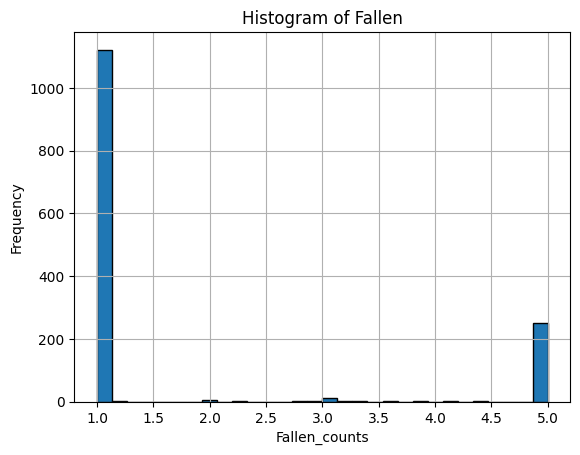

In [ ]:
import matplotlib.pyplot as plt
df['fall-how_many_last_12_month'].hist(bins=30, edgecolor='black')

# Customize plot
plt.xlabel("Fallen_counts")
plt.ylabel("Frequency")
plt.title("Histogram of Fallen")
plt.show()

In [ ]:
df["fall-how_many_last_12_month_scrambled"] = df["fall-how_many_last_12_month"]

In [ ]:
df.drop(columns=['fall-how_many_last_12_month_scrambled'], inplace=True)

In [ ]:
df

,fallen,id,age,procedure,diagnosis,c_zriserh1,decubitus-admission,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-skin_condition,transfer-impairment,medical_items,medical_items-arm_or_leg_splint,medical_items-A_V_system,medical_items-plaster_or_neck_brace,medical_items-compression_stocking,medical_items-ventilation_mask,medical_items-O2_glasses,medical_items-orthesis,medical_items-prosthesis,medical_items-skin_condition_at_item_application,fall-last_12_month,fall-how_many_last_12_month,fall-while_stay,fall-while_transfer,...,transfer_2,transfer_3,transfer_4A,transfer_4B,transfer_Unknown,bed_mobility-jones_1,bed_mobility-jones_2,bed_mobility-jones_3,bed_mobility-jones_4A,bed_mobility-jones_4B,bed_mobility-jones_Unknown,walk-jones_1,walk-jones_2,walk-jones_3,walk-jones_4A,walk-jones_4B,walk-jones_Unknown,decubitus-risk_+,decubitus-risk_++,decubitus-risk_0,decubitus-risk_Unknown,fall-risk_+,fall-risk_++,fall-risk_0,fall-risk_Unknown
0,False,179020,39,0,S250,False,<NA>,<NA>,<NA>,<NA>,False,<NA>,False,False,False,False,False,False,False,False,<NA>,<NA>,NaN,<NA>,<NA>,...,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True
1,False,112009,29,0,M418,False,False,<NA>,<NA>,<NA>,<NA>,False,False,False,False,False,False,False,False,False,<NA>,<NA>,NaN,<NA>,<NA>,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
2,False,54403,29,9-26,S910,False,<NA>,False,<NA>,<NA>,<NA>,<NA>,False,False,False,False,False,False,False,False,<NA>,<NA>,NaN,<NA>,<NA>,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False
3,False,13054,64,8-77,M400,True,<NA>,<NA>,<NA>,<NA>,False,<NA>,False,False,False,False,False,False,False,False,<NA>,<NA>,NaN,<NA>,False,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False
4,False,45770,89,8-93,K630,False,<NA>,False,<NA>,<NA>,<NA>,<NA>,False,False,False,False,False,False,False,False,<NA>,<NA>,NaN,<NA>,<NA>,...,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,89687,39,3-80,K805,False,<NA>,False,False,<NA>,<NA>,<NA>,False,False,False,False,False,False,False,False,<NA>,<NA>,NaN,<NA>,False,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
39996,False,173073,49,0,O421,False,False,<NA>,False,<NA>,<NA>,<NA>,False,False,False,False,False,False,False,False,<NA>,False,NaN,<NA>,<NA>,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True
39997,False,41549,74,5-81,Q210,False,False,<NA>,<NA>,<NA>,False,<NA>,False,False,False,False,False,False,False,False,False,True,5.0,False,False,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False
39998,False,464294,59,0,0,False,<NA>,False,<NA>,<NA>,<NA>,<NA>,False,False,False,False,False,False,False,False,<NA>,<NA>,NaN,<NA>,<NA>,...,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True


### Output CSV created

In [ ]:
df.to_csv('output.csv', index=False)

In [ ]:
pwd()

'c:\\Users\\felix\\OneDrive\\Dokumente\\FU_Working\\ApplAna'

In [ ]:
# Step 1: Copy the column to a new column
df['fall_scrambled'] = df['fall-how_many_last_12_month'].copy()

# Step 2: Remove missing values and randomly shuffle the column
non_missing_values = df['fall_scrambled'].dropna().sample(frac=1, random_state=42).values  # Shuffle

# Step 3: Replicate values so that there are as many as needed
num_missing = df['fall-how_many_last_12_month'].isna().sum()
replicated_values = np.tile(non_missing_values, (num_missing // len(non_missing_values) + 1))[:num_missing]

# Step 4: Join the scrambled column with the original DataFrame
df.loc[df['fall-how_many_last_12_month'].isna(), 'fall-how_many_last_12_month'] = replicated_values

# Step 5: Drop the scrambled column (optional)
df.drop(columns=['fall_scrambled'], inplace=True)

# Check if missing values are imputed
print(df['fall-how_many_last_12_month'].isna().sum())  # Should be 0 if all NaNs were filled

0


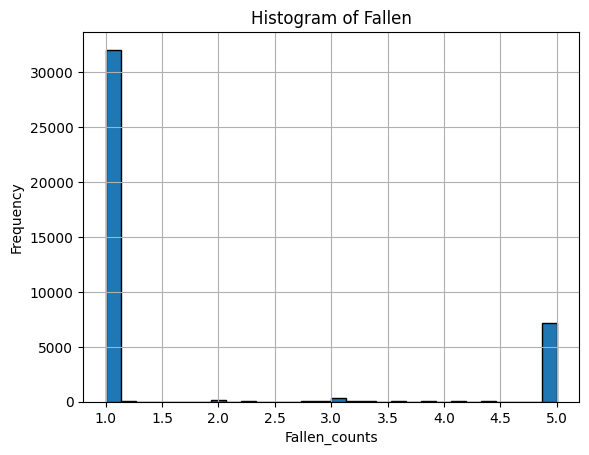

In [ ]:
import matplotlib.pyplot as plt
df['fall-how_many_last_12_month'].hist(bins=30, edgecolor='black')

# Customize plot
plt.xlabel("Fallen_counts")
plt.ylabel("Frequency")
plt.title("Histogram of Fallen")
plt.show()

Correlation of fall-how_many_last_12_month drops to almost zero

<Axes: >

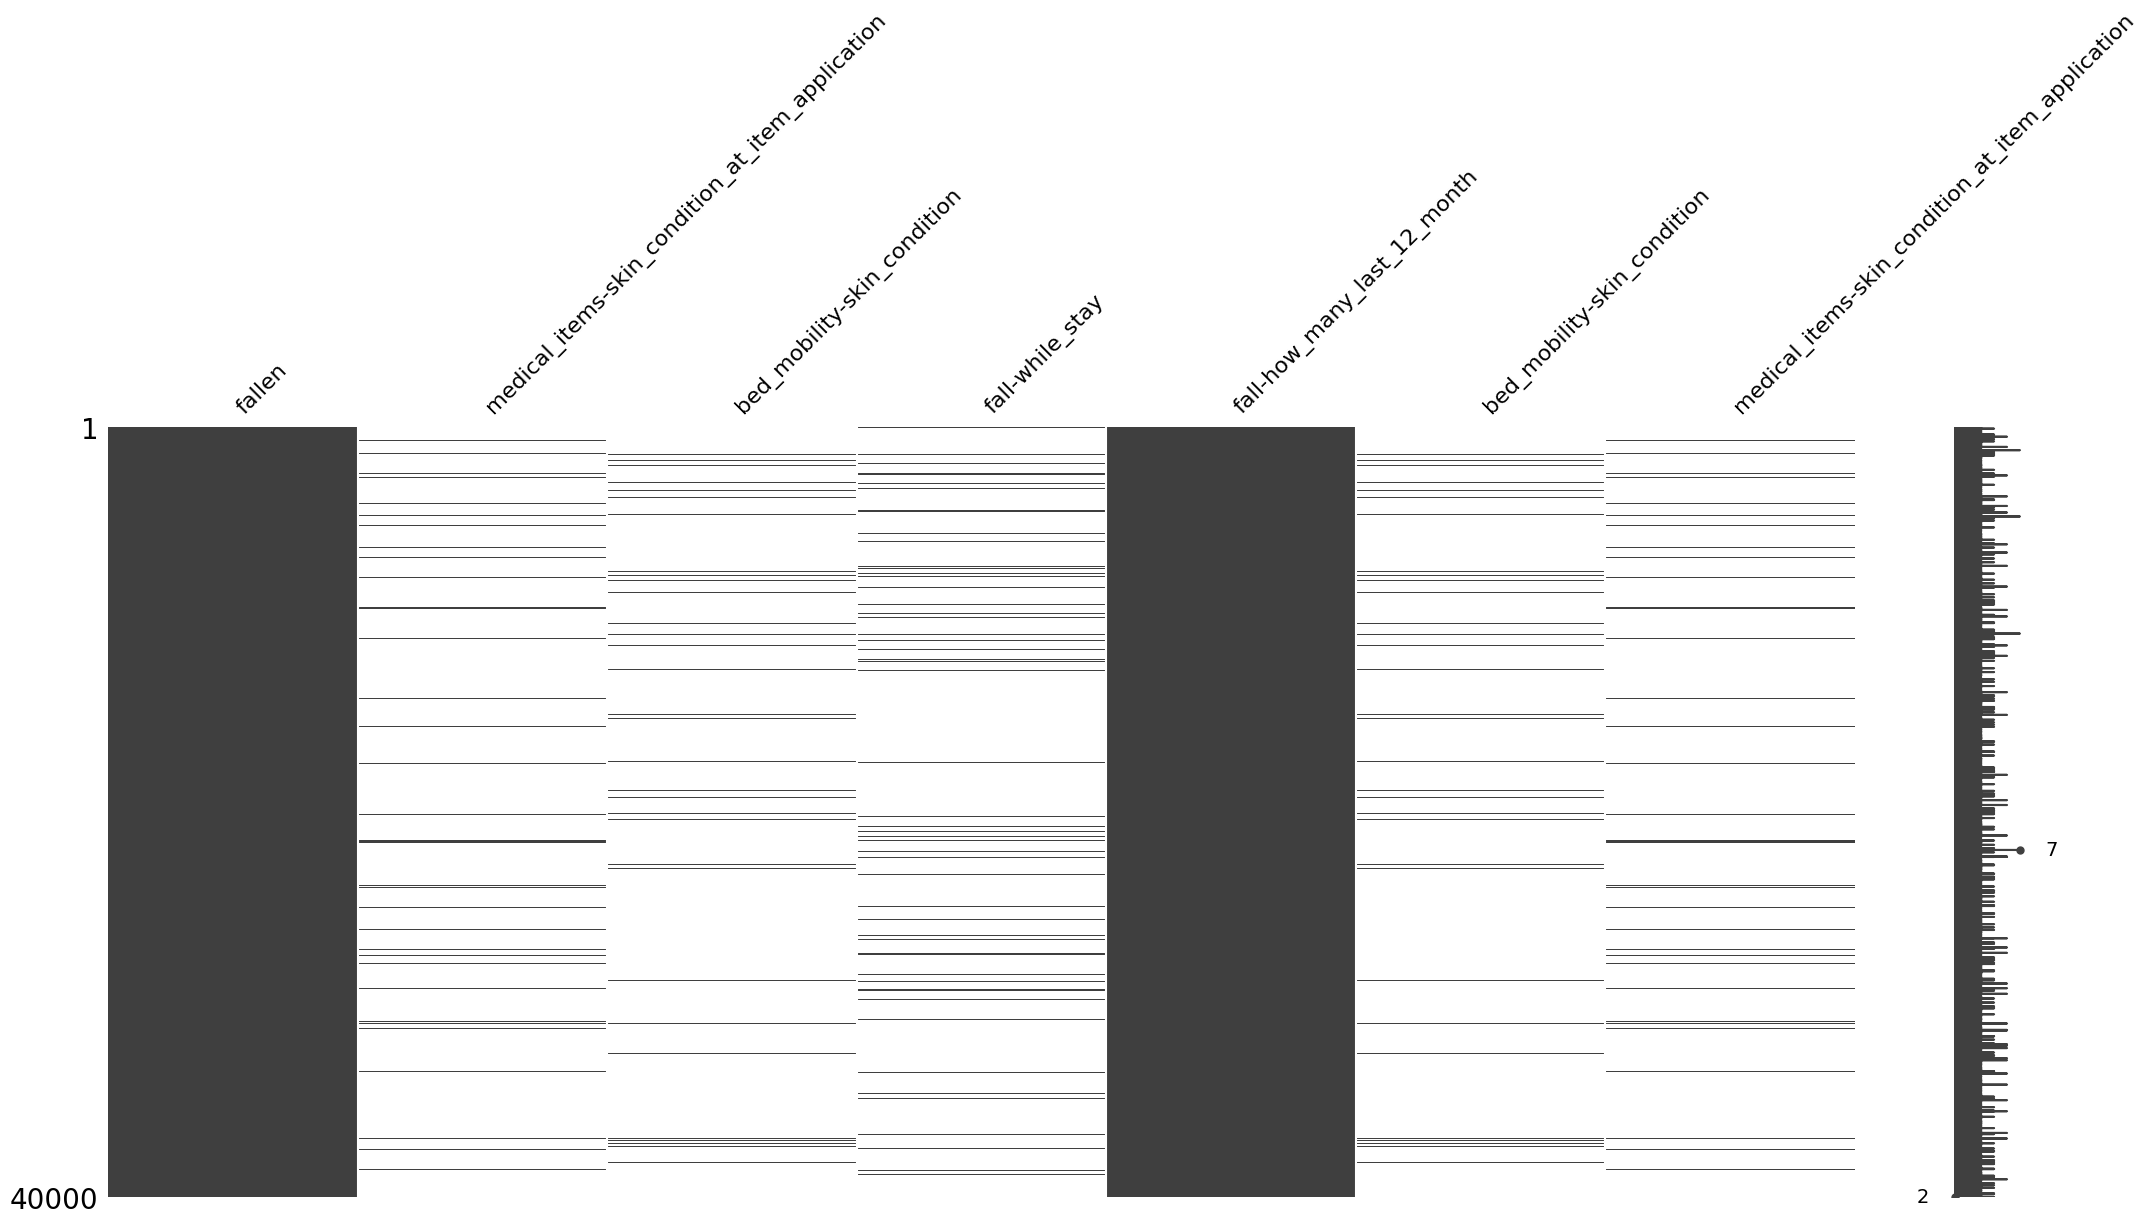

In [ ]:
import missingno as msno

msno.matrix(df[['fallen', 'medical_items-skin_condition_at_item_application', 'bed_mobility-skin_condition', 'fall-while_stay', 'fall-how_many_last_12_month', 'bed_mobility-skin_condition', 'medical_items-skin_condition_at_item_application']])


In [ ]:
df.columns

Index(['fallen', 'id', 'age', 'procedure', 'diagnosis', 'c_zriserh1',
       'decubitus-admission', 'decubitus-at_the_moment',
       'bed_mobility-impairment', 'bed_mobility-skin_condition',
       'transfer-impairment', 'medical_items',
       'medical_items-arm_or_leg_splint', 'medical_items-A_V_system',
       'medical_items-plaster_or_neck_brace',
       'medical_items-compression_stocking', 'medical_items-ventilation_mask',
       'medical_items-O2_glasses', 'medical_items-orthesis',
       'medical_items-prosthesis',
       'medical_items-skin_condition_at_item_application',
       'fall-last_12_month', 'fall-how_many_last_12_month', 'fall-while_stay',
       'fall-while_transfer', 'walk-impairment',
       'walk-balance_and_gait_impaired', 'walking_aid',
       'excretions-impairment', 'excretions-incontinence',
       'excretions-nykturie', 'cognition-impairment',
       'cognition-disoriented_time', 'cognition-disoriented_location',
       'cognition-disoriented_own_person', 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define predictors (X) and target (y)
X = df.drop(columns=['fallen', 'diagnosis', 'procedure'])  # Drop target
y = df['fallen']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#mkaes no difference, where the cutoff is
y_pred_adjusted = (rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)  # Beware of class imbalance!
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])  # Get probabilities for ROC AUC

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.9976
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.9650


c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


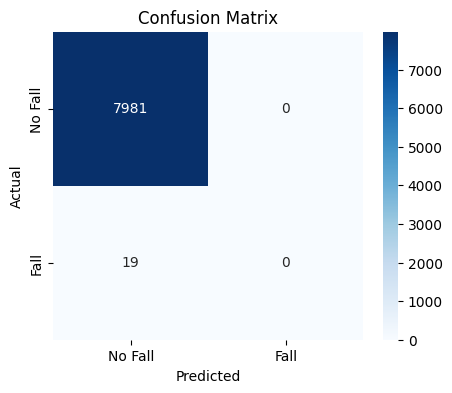

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


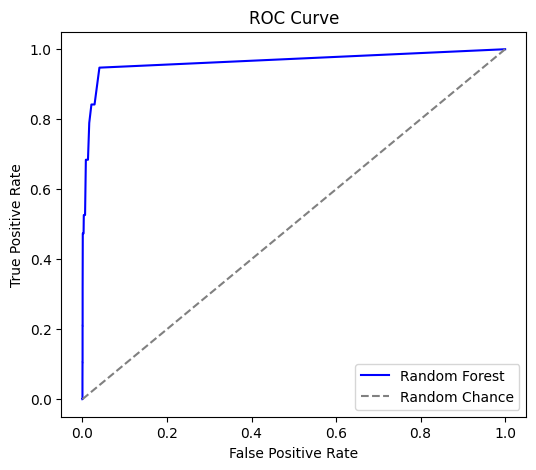

In [ ]:
from sklearn.metrics import roc_curve

y_probs = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linestyle='-', color='blue', label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
y_probs = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1
pd.Series(y_probs).describe()

count    8000.000000
mean        0.002244
std         0.017009
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.400000
dtype: float64

In [ ]:
#Second iteration with class weigths
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_probs = rf.predict_proba(X_test)[:, 1]  # Get probability for class 1
pd.Series(y_probs).describe()

count    8000.000000
mean        0.001793
std         0.015621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.450000
dtype: float64

In [ ]:
y_pred_adjusted = (rf.predict_proba(X_test)[:, 1] > 0.1).astype(int)

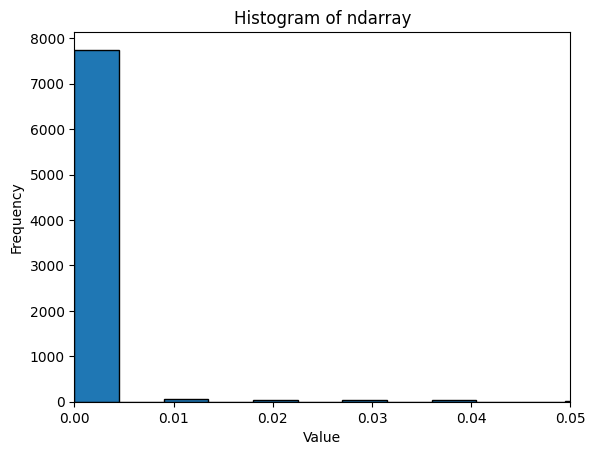

In [ ]:
import matplotlib.pyplot as plt
# Plot histogram
plt.hist(y_probs, bins=100, edgecolor='black')  # Increase bins for finer granularity
plt.xlim(0, 0.05)  # Focus on small values (adjust as needed)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of ndarray")
plt.show()

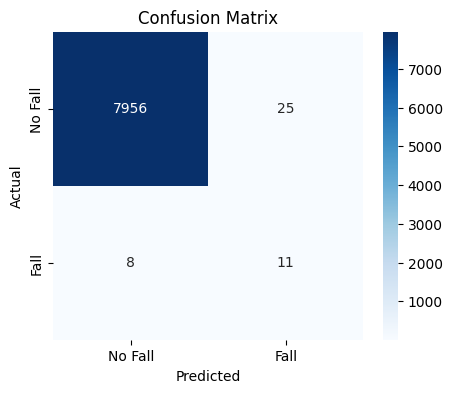

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)  # Beware of class imbalance!
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])  # Get probabilities for ROC AUC

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.9959
Precision: 0.3056
Recall: 0.5789
F1 Score: 0.4000
ROC AUC Score: 0.9945


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Adjust as needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df["diagnosis"].value_counts().to_string()


'diagnosis\n0       1098\nA010     484\nA014     240\nA031     217\nA045     140\nA048     130\nA047     119\nA059      97\nA071      97\nA072      87\nA090      77\nA099      73\nA154      71\nA152      61\nA150      53\nA230      51\nA160      48\nA181      48\nA310      46\nA162      45\nA321      43\nA169      43\nA180      43\nA163      41\nA182      41\nA418      39\nA600      39\nA498      38\nA410      38\nA415      36\nA408      35\nA499      34\nA419      33\nA539      32\nA411      29\nA878      29\nA46       29\nD684      28\nF841      28\nD703      28\nA630      27\nH431      27\nA390      27\nA542      27\nI351      26\nD400      26\nH610      26\nC799      26\nG628      25\nD431      25\nF330      25\nA970      25\nL303      25\nF067      25\nA692      25\nH100      25\nB010      24\nH178      24\nG600      24\nH187      24\nA530      24\nB04       24\nH024      24\nA510      24\nC181      23\nD509      23\nG404      23\nB023      23\nH043      23\nI491      23\nF420    